## FML Final Project


In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Open Source data manipulation tool
import pandas as pd

In [ ]:
#LoadTrainning data
training1=pd.read_csv('/content/drive/My Drive/fomlFinal/training1.csv')
training2=pd.read_csv('/content/drive/My Drive/fomlFinal/training2.csv')

In [ ]:
#rest of the imports
import numpy as np
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
#allows for predictive data analysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV
#Logistical Regression import
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
%matplotlib inline
#modeling tools and functions
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
#Checking all the data in the CSV files with a confident of 0.66 and lower.
data = training2

# Using that data and removing it so that only lists of confident CNN's are at access
data.drop(data.loc[data['confidence']==0.66].index, inplace=True)

print(data)

          CNNs  CNNs.1   CNNs.2   CNNs.3  CNNs.4  CNNs.5   CNNs.6    CNNs.7  \
5     0.978710     0.0  0.53106  0.08954  0.0000  0.0000      NaN  0.000000   
6     0.000000     0.0      NaN  1.28070  0.0000  2.3988  0.00000  0.000000   
8     0.930910     0.0  0.00000  0.00000  0.0000  0.0000  0.20444  0.749020   
11    0.000000     NaN  0.90912  0.00000  0.0000  0.0000  0.00000       NaN   
14    0.000000     0.0  1.95110      NaN  0.0000  0.0000  0.00000  0.000000   
...        ...     ...      ...      ...     ...     ...      ...       ...   
2776  0.000000     0.0  0.00000  0.35047  1.9866  0.1752  0.00000       NaN   
2785  0.541410     0.0      NaN  0.56338  0.0000  0.0000  0.19530  1.037000   
2786  0.000000     0.0      NaN  0.00000  0.0000  0.0000      NaN       NaN   
2788  0.058926     NaN  0.00000  0.00000     NaN  0.0000  0.13947  0.000000   
2797  0.000000     0.0  0.00000  0.00000  2.1172  0.0000      NaN  0.061342   

       CNNs.8    CNNs.9  ...  GIST.504  GIST.505  G

In [ ]:
#Check to see if any data is replicated anywhere
repli = data.duplicated()

print(repli.any())
print(data[repli])

#Then check which values only have singular numbers attached to them
xy = data.nunique()
removeV = [i for i,v in enumerate(xy) if v == 1]
print(removeV)

False
Empty DataFrame
Columns: [CNNs, CNNs.1, CNNs.2, CNNs.3, CNNs.4, CNNs.5, CNNs.6, CNNs.7, CNNs.8, CNNs.9, CNNs.10, CNNs.11, CNNs.12, CNNs.13, CNNs.14, CNNs.15, CNNs.16, CNNs.17, CNNs.18, CNNs.19, CNNs.20, CNNs.21, CNNs.22, CNNs.23, CNNs.24, CNNs.25, CNNs.26, CNNs.27, CNNs.28, CNNs.29, CNNs.30, CNNs.31, CNNs.32, CNNs.33, CNNs.34, CNNs.35, CNNs.36, CNNs.37, CNNs.38, CNNs.39, CNNs.40, CNNs.41, CNNs.42, CNNs.43, CNNs.44, CNNs.45, CNNs.46, CNNs.47, CNNs.48, CNNs.49, CNNs.50, CNNs.51, CNNs.52, CNNs.53, CNNs.54, CNNs.55, CNNs.56, CNNs.57, CNNs.58, CNNs.59, CNNs.60, CNNs.61, CNNs.62, CNNs.63, CNNs.64, CNNs.65, CNNs.66, CNNs.67, CNNs.68, CNNs.69, CNNs.70, CNNs.71, CNNs.72, CNNs.73, CNNs.74, CNNs.75, CNNs.76, CNNs.77, CNNs.78, CNNs.79, CNNs.80, CNNs.81, CNNs.82, CNNs.83, CNNs.84, CNNs.85, CNNs.86, CNNs.87, CNNs.88, CNNs.89, CNNs.90, CNNs.91, CNNs.92, CNNs.93, CNNs.94, CNNs.95, CNNs.96, CNNs.97, CNNs.98, CNNs.99, ...]
Index: []

[0 rows x 4610 columns]
[4609]


In [ ]:
#Find CNN points of value
propTotal = list(data.columns.values)
propCNN = [s for s in propTotal if "CNNs." in s]
dataCNN = data[propCNN]

#Finding GIST discriptors
GISTdescrip = [s for s in propTotal if "GIST." in s]
dataGIST = data[GISTdescrip]

In [ ]:
# Pre-processing data
def preProcess(data):

  #firstly convert datavalues into a fram
  dArray = data.values
  #Normalization
  maxScale = MinMaxScaler(feature_range = (0,1))
  data_normalization = maxScale.fit_transform(dArray)

  #Input
  imputation = SimpleImputer(strategy='mean')
  dImputing = imputation.fit_transform(data_normalization)
  
  #reduce size of diamensions
  smallPCA = PCA(n_components=10)
  dPCA = smallPCA.fit_transform(dImputing) 

  #show plot
  plt.scatter(dPCA[:,0],dPCA[:,1])
  return dPCA


#model evaluation
def evaModel(model, train_x, train_y):
  #k fold cross validation
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	yx = cross_val_score(model, train_x, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
	return yx 

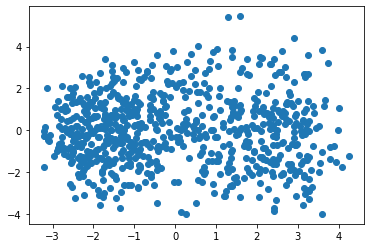

In [ ]:
#Retreieve all training information

prop = list(data.columns.values)
prop.remove('label')
propData = data[prop]
tLabel = data['label']
traData=preProcess(propData)

In [ ]:
#imporatnce levels:
#calculation CNN
import statistics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(dataCNN, tLabel, test_size=0.25, random_state=42)
xS = MinMaxScaler(feature_range = (0,1))
xTraS = xS.fit_transform(xTrain)
XTeS = xS.transform(xTest)


mod = XGBClassifier()
mod.fit(xTraS , yTrain)
importances = pd.DataFrame(data={
    'Attribute': xTrain.columns,
    'Importance': mod.feature_importances_
})
CNNImpo = statistics.mean(mod.feature_importances_)

print(CNNImpo)

0.00024420026


In [ ]:
#imporatnce levels:
#calculation GIST
xTrain, xTest, yTrain, yTest = train_test_split(dataGIST, tLabel, test_size=0.25, random_state=42)
xS = MinMaxScaler(feature_range = (0,1))
xTraS = xS.fit_transform(xTrain)
XTeS = xS.transform(xTest)

mod = XGBClassifier()
mod.fit(xTraS, yTrain)
importances = pd.DataFrame(data={
    'Attribute': xTrain.columns,
    'Importance': mod.feature_importances_
})
gImpo = statistics.mean(mod.feature_importances_)

print(gImpo)

0.0019569471


>mean 0.740 (0.042)
>median 0.750 (0.047)
>most_frequent 0.746 (0.050)
>constant 0.746 (0.046)


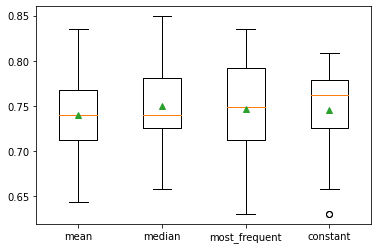

In [ ]:
#Checking to see if inputting functions work

Res = list()
methods = ['mean', 'median', 'most_frequent', 'constant']

#for loop to check through each other and output its score.
for m in methods:
	#creat pipeline
	pipeL = Pipeline(steps=[('i', SimpleImputer(strategy=m)), ('m', RandomForestClassifier())])
	#model eval
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	count = cross_val_score(pipeL, propData, tLabel, scoring='accuracy', cv=cv, n_jobs=-1)
	#save results
	Res.append(count)
	print('>%s %.3f (%.3f)' % (m, mean(count), std(count)))
#plot box plot to compare methods
plt.boxplot(Res, labels=methods, showmeans=True)
plt.show()

NB : 0.739152 (0.044049)
K-NN : 0.693533 (0.044018)
Random Forest : 0.735505 (0.046478)
Logi. Regression : 0.747797 (0.040121)
Multi Perceptron : 0.715864 (0.045373)


Text(0, 0.5, 'Acc.')

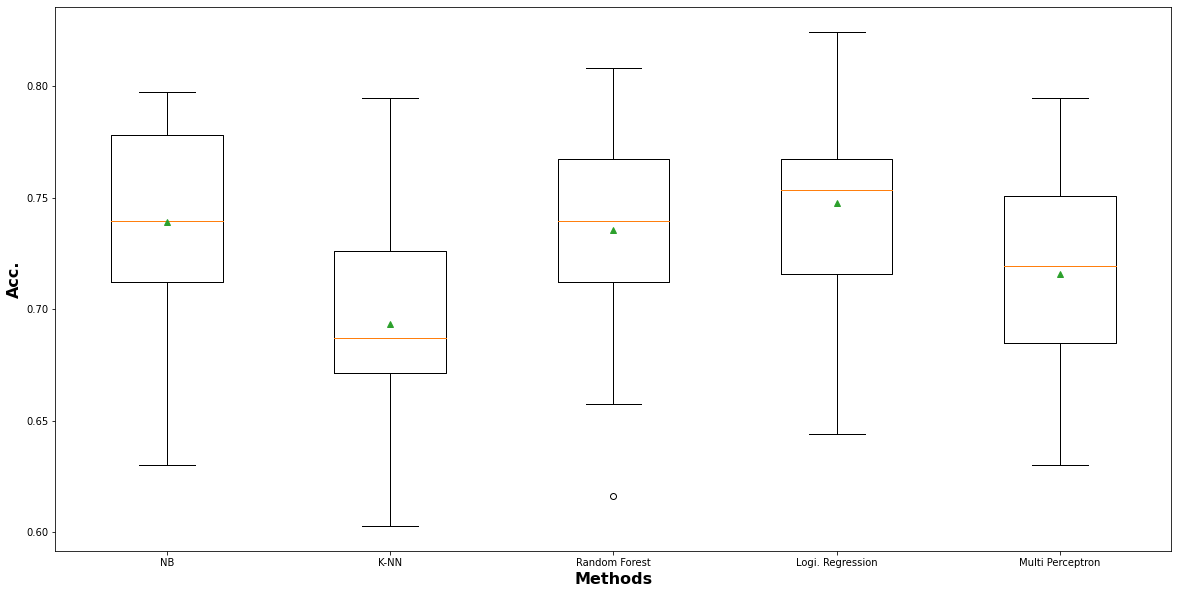

In [ ]:
#check values for all results
def useModel():
  models = dict()
  models['NB'] =GaussianNB()
  models['K-NN'] = KNeighborsClassifier()
  models['Random Forest'] = RandomForestClassifier()
  models['Logi. Regression'] = LogisticRegression()
  models['Multi Perceptron'] = MLPClassifier()

  #return
  return models

#retrieve all the models for evaluating
modeling = useModel()

#store results for models
results, names = list(), list()
for name, model in modeling.items():
  yx = evaModel(model, traData, tLabel)
  results.append(yx)
  names.append(name)
  print('%s : %f (%f)' % (name, mean(yx), std(yx)))


#print out plot and confidence ratings
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.boxplot(results, labels=names, showmeans=True)
ax.set_xlabel('Methods', fontsize=16, fontweight='bold')
ax.set_ylabel('Acc.', fontsize=16, fontweight='bold')

In [ ]:
#using logisitic regress as it provides the highest confidence
model = LogisticRegression()
#creating a grid parameter
pGrid = [
    {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter' : [100,110,120,130,140],
    'dual':[True,False]
    }
]

#search throughout the grid
#and actually define it
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
gSearch  = GridSearchCV(estimator=model, param_grid = pGrid, n_jobs=-1, cv=cv, scoring='accuracy')
gResult = gSearch.fit(traData, tLabel)

#provide best result for LR
print("Improved LR Score: %f using %s" % (gResult.best_score_, gResult.best_params_))

Improved LR Score: 0.750987 using {'C': 11.288378916846883, 'dual': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
21000 fits failed out of a total of 36000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError

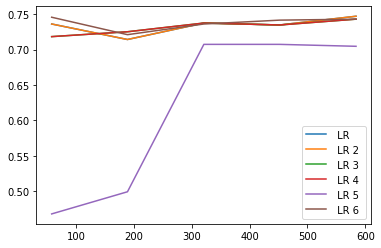

In [ ]:
#Check/graph LR class
def gMod():
  tMod = dict()
  tMod['LR'] = LogisticRegression()
  tMod['LR 2'] = LogisticRegression(penalty='l2')
  tMod['LR 3'] = LogisticRegression(penalty='l2',C=0.012742749857031334)
  tMod['LR 4'] = LogisticRegression(penalty='l2',C=0.012742749857031334,solver='newton-cg')
  tMod['LR 5'] = LogisticRegression(penalty='l1',C=0.012742749857031334,solver='liblinear')
  tMod['LR 6'] = LogisticRegression(penalty='l2',C=0.012742749857031334,solver='liblinear')
  return tMod


#Evaluate Model
tMod = gMod()

#plot graph against training data
for name, model in tMod.items():
    (train_sizes,
     train_scores,
     test_scores) = learning_curve(model, traData, tLabel, cv=5)
    test_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, test_mean, label=' %s ' % (name))

#show plot
plt.legend()
plt.show()

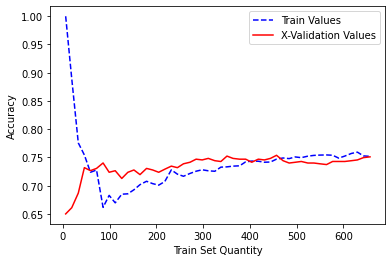

In [ ]:
#draw rate of learning for LR
model=LogisticRegression(penalty='l2',C=0.012742749857031334,solver='liblinear',max_iter = 100)

#for x-validation
sizes, training_scores, testing_scores = learning_curve(model, traData, tLabel, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
#mean and standard deviation calculations for training data
meanTraining = np.mean(training_scores, axis=1)
sdTraining = np.std(training_scores, axis=1)
  
#same for testing data
meanTesting = np.mean(testing_scores, axis=1)
sdTesting = np.std(testing_scores, axis=1)
  
# blue line for training val, red for x-validation
plt.plot(sizes, meanTraining, '--', color="b",  label="Train Values")
plt.plot(sizes, meanTesting, color="r", label="X-Validation Values")
  
#show plot
plt.xlabel("Train Set Quantity"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.show()

In [ ]:
#creating a test CSV file for data save
check = pd.read_csv('/content/drive/My Drive/fomlFinal/test.csv')

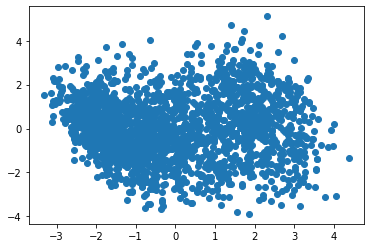

In [ ]:
t_Data = preProcess(check)
# fit final model
modPlot = LogisticRegression(penalty='l2',C=0.012742749857031334,solver='liblinear',max_iter = 100)
modPlot.fit(traData,tLabel)
predictions = model.predict(t_Data)

In [ ]:
#final predictions saved to csv
prediction = pd.DataFrame(predictions, columns=['prediction']).to_csv('predictions.csv')
from google.colab import files
files.download("predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>